# Practica de la cuba - Visualizacion y procesamiento de datos#

## Objetivo de la practica##

En la practica se tiene una cuba con agua (material poco conductor de la electricidad) donde se colocan electrodos con voltaje fijo. Debido a la presencia de los electrodos y a la baja conductividad del agua se genera una leve corriente en el volumen del liquido (que debido a la simetria en z consideramos un plano). Asociada a esta corriente hay un campo electrico que moviliza las cargas y por lo tanto hay un potencial que toma diferentes valores para cad apunto del plano. 

En la practica, utilizando un multimetro se mide el voltaje en diferentes puntos de la superficie. A partir de dichas mediciones (serie de datos de V en funcion de x e y) de pretende visualizar y procesar los datos para ver como es la forma del campo electrico creado.

## Introduccion de datos##

Para la introduccion de datos queremos tener la opcion de cargar el archivo de datos ya guardado o crear datos nuevos

In [1]:
# Procesamiento de datos

## Es importante correr esto antes que el bloque anterior porque aca se define el procesamiento de datos al que llaman los botones

import pandas as pd
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cargar_datos():
    # Cheqeamos que exista el archivo
    nombre_archivo = filename.value+'.csv'
    # Chequeamos que exista el archivo
    if not os.path.isfile(nombre_archivo):
        if filename.value=='':
            print ('Debe introducir un nombre de archivo valido')
            return
        else:
            print ('El archivo especificado no fue encontrado (recuerde no incluir el .csv en el nombre')
            return
    # Leemos los datos
    df = pd.read_csv(nombre_archivo)
    return df
    
def ver_archivo (button):
    data = cargar_datos()
    print ('Contenido del archivo: '+filename.value+'.csv')
    display(data)
    
def ver_3D (button):
    data = cargar_datos()
    if data is None:
        return
    ax = plt.axes(projection='3d')
    ax.scatter(data['X'].tolist(), data['Y'].tolist(), data['V'].tolist(), c=data['V'].tolist(), cmap='viridis', linewidth=0.5);

def autocompletar (data):
    # Esta funcion toma los datos medidos que no tienen porque estar equiespaciados y genera una cuadricula de valores
    # equiespaciados con una regresion lineal
    numero_de_puntos = 100
    ti = np.linspace(data['X'].min(), data['X'].max(),numero_de_puntos)

Nombre del archivo donde se guardaran los datos: (distingue mayusculas de minusculas)


Text(value='')

Checkbox(value=False, description='Permitir edición')

Introduccion de datos nuevos: (use , para marcar decimales si el sistema esta en español)


FloatText(value=0.0, description='X:')

FloatText(value=0.0, description='Y:')

FloatText(value=0.0, description='V:')

Button(description='Agregar dato', style=ButtonStyle(), tooltip='Boton para agregar datos')

Button(description='Ver datos cargados', style=ButtonStyle(), tooltip='Muestra el contenido del archivo')

Button(description='visalizar en 3D', style=ButtonStyle(), tooltip='Visualizar')

Contenido del archivo: prueba.csv


,X,Y,V
0,0.0,0.0,10.0
1,0.0,1.0,9.0
2,0.0,2.0,8.0
3,0.0,3.0,4.0
4,0.0,4.0,-3.0
5,0.0,5.0,3.0
6,1.0,0.0,0.0
7,1.0,1.0,1.0
8,1.0,2.0,6.0
9,1.0,3.0,8.0


Dato ingresado con exito
Dato ingresado con exito
Dato ingresado con exito
Dato ingresado con exito
Dato ingresado con exito
Dato ingresado con exito
Contenido del archivo: prueba.csv


,X,Y,V
0,0.0,0.0,10.0
1,0.0,1.0,9.0
2,0.0,2.0,8.0
3,0.0,3.0,4.0
4,0.0,4.0,-3.0
5,0.0,5.0,3.0
6,1.0,0.0,0.0
7,1.0,1.0,1.0
8,1.0,2.0,6.0
9,1.0,3.0,8.0


Dato ingresado con exito
Dato ingresado con exito


<IPython.core.display.Javascript object>


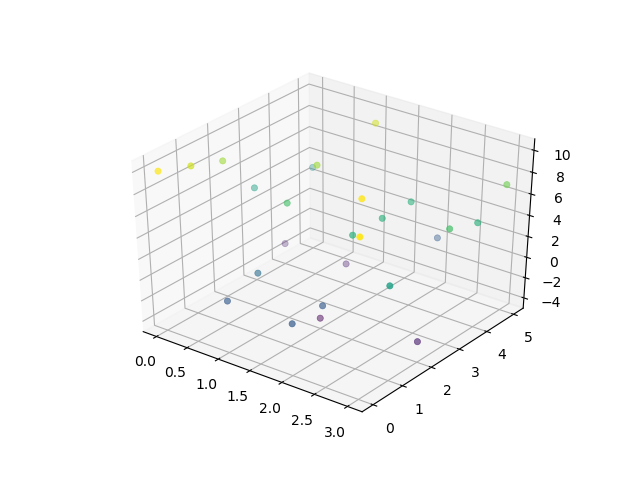

In [2]:
from ipywidgets import widgets
from IPython.display import display
import os
import csv

## Definimos los widgets y los mostramos en pantalla
# Para ver mas detalles: http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html
# https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/

# Nombre del archivo
filename = widgets.Text()
print ('Nombre del archivo donde se guardaran los datos: (distingue mayusculas de minusculas)')
display(filename)

# Edicion habilitada
editar = widgets.Checkbox(
    value=False,
    description='Permitir edición',
    disabled=False
)
display (editar)

# Nombre del tipo de unidades
#unidades = widgets.Text()
#print ('Unidad de distancia utilizada (por ej: mm):')
#display(unidades)

# Introduccion de datos nuevos
print ('Introduccion de datos nuevos: (use , para marcar decimales si el sistema esta en español)')
coordenadaX = widgets.FloatText(
    value=0,
    description='X:',
    disabled=False
)
display (coordenadaX)

coordenadaY = widgets.FloatText(
    value=0,
    description='Y:',
    disabled=False
)
display (coordenadaY)

voltaje = widgets.FloatText(
    value=0,
    description='V:',
    disabled=False
)
display (voltaje)

def agregar_dato (button):
    # Verificamos que no se ingrese un valor en blanco por haber clikeado accidentalmente el boton
    if [coordenadaX.value,coordenadaY.value,voltaje.value] == [0,0,0]:
        return
    
    # Documentacion sobre CSV en python http://beancoder.com/csv-files-using-python/
    if editar.value:
        nombre_archivo = filename.value+'.csv'
        # Chequeamos que exista el archivo, sino lo creamos con el header
        # Chequeamos que el nombre sea valido
        if not os.path.isfile(nombre_archivo):
            if filename.value=='':
                print ('Debe introducir un nombre de archivo valido')
                return
            with open(nombre_archivo,'w') as newFile:
                newFileWriter = csv.writer(newFile)
                newFileWriter.writerow(['X','Y','V'])
                print ('Archivo: ' + nombre_archivo + ' creado exitosamente')
            
        # una vez chequeada la existencia del archivo o creado procedemos a agregar el dato nuevo
        with open(nombre_archivo,'a') as newFile:
            newFileWriter = csv.writer(newFile)
            newFileWriter.writerow([coordenadaX.value,coordenadaY.value,voltaje.value])
            print ('Dato ingresado con exito')
            # reseteamos los inputs
            coordenadaX.value = 0
            coordenadaY.value = 0
            voltaje.value = 0
    else:
        print ('Edicion del archivo no habilitada')
        
        
# Boton para agregar datos
agregar = widgets.Button(
    description='Agregar dato',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Boton para agregar datos',
    #icon='check'
)
agregar.on_click(agregar_dato)
display (agregar)

# Boton para ver datos
ver_datos = widgets.Button(
    description='Ver datos cargados',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Muestra el contenido del archivo',
    #icon='check'
)
ver_datos.on_click(ver_archivo)
display (ver_datos)

# Boton para ver en 3D
visualizar_3D = widgets.Button(
    description='visalizar en 3D',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Visualizar',
    #icon='check'
)
visualizar_3D.on_click(ver_3D)
display (visualizar_3D)



In [3]:
data = cargar_datos()

In [7]:
from scipy import interpolate
from scipy.interpolate import griddata


# Esta funcion toma los datos medidos que no tienen porque estar equiespaciados y genera una cuadricula de valores
# equiespaciados con una regresion lineal

# Definimos el numero de puntos en cada eje
numero_de_puntos = 10
# Creamos los vectores de coordenadas en cada eje
ti = np.linspace(data['X'].min(), data['X'].max(),numero_de_puntos)
tj = np.linspace(data['Y'].min(), data['Y'].max(),numero_de_puntos)
# Creamos la matriz de puntos
xi,yi = np.meshgrid(ti,tj)
# Creamos el valor de Z que corresponde a cada punto xi,yi interponlando los valores originales
zi = griddata((data['X'],data['Y']),data['V'],(xi,yi),method='linear')



In [11]:
zi

array([[10.        ,  6.66666667,  3.33333333,  0.        ,  0.        ,
         0.        ,  0.        ,  3.33333333,  6.66666667, 10.        ],
       [ 9.44444444,  6.11111111,  3.22222222,  0.55555556,  0.22222222,
         0.        ,  0.        ,  1.33333333,  3.33333333,  6.66666667],
       [ 8.88888889,  6.88888889,  4.22222222,  1.55555556,  0.16666667,
        -0.16666667,  0.55555556,  3.66666667,  5.        ,  3.22222222],
       [ 8.33333333,  7.66666667,  7.        ,  4.33333333, -2.33333333,
        -2.66666667,  3.33333333,  6.88888889,  4.22222222, -0.66666667],
       [ 7.11111111,  6.44444444,  5.77777778,  6.44444444, -0.22222222,
        -1.        ,  5.        ,  4.33333333,  1.66666667, -1.        ],
       [ 4.88888889,  4.88888889,  6.22222222,  7.55555556,  4.66666667,
         3.66666667,  5.        ,  5.33333333,  5.66666667,  4.        ],
       [ 1.66666667,  1.66666667,  3.        ,  4.33333333,  3.33333333,
         2.33333333,  5.        ,  5.33333333